<a href="https://colab.research.google.com/github/chiku27/Machine_Learning-Data_Science/blob/master/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn import datasets
df_1=datasets.load_digits()
dir(df_1)

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
print('Size of the dataset',len(df_1.target))

Size of the dataset 1797


In [4]:
df_1.target

array([0, 1, 2, ..., 8, 9, 8])

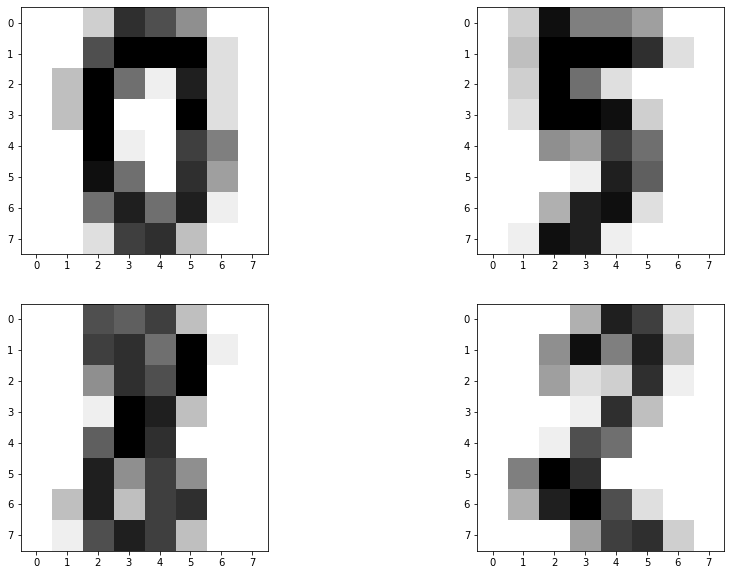

In [5]:
#Let's check out some random images
fig,axes=plt.subplots(2,2,figsize=(15,10))
axes[0,0].imshow(df_1.images[20],cmap=plt.cm.gray_r)
axes[0,1].imshow(df_1.images[35],cmap=plt.cm.gray_r)
axes[1,0].imshow(df_1.images[40],cmap=plt.cm.gray_r)
axes[1,1].imshow(df_1.images[50],cmap=plt.cm.gray_r)


Now let's split the dataset 70 percent for training and 30 percent for testing i.e 1257 data-points for training and 540 for testing and apply Random Forest Classifier.

For parameter optimization i.e choosing out best parameters apply GridSearch.

In [6]:
from sklearn.svm import SVC
mod=SVC()
from sklearn.model_selection import GridSearchCV
mod1=GridSearchCV(mod,param_grid={'kernel':['rbf','linear','poly'],'C':[0.4,0.6,0.8,1]},cv=5)
mod1.fit(df_1.data[1:1257],df_1.target[1:1257])

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.4, 0.6, 0.8, 1],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [7]:
mod1.best_params_

{'C': 0.8, 'kernel': 'poly'}

So from GridSearch we got best parameters then we are now going to train the model with these parameters

In [8]:
mod2=SVC(kernel='poly',C=0.8)
mod2.fit(df_1.data[1:1257],df_1.target[1:1257])

SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

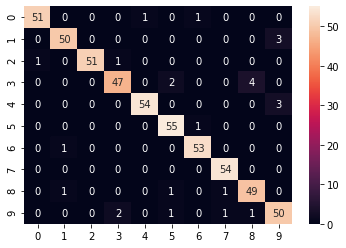

In [9]:
y_pred=mod2.predict(df_1.data[1257:1797])
y_true=df_1.target[1257:1797]
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
sns.heatmap(cm,annot=True)

In [10]:
#Now let's chcek out accuracy
print('Test set score is\n',mod2.score(df_1.data[1257:1797],df_1.target[1257:1797]))

Test set score is
 0.9518518518518518


So we got accuracy greater than 95 percent.
Here we have to test the hypothesis that whether the accuracy is greater than 95 % everytime or not.
So Ho:Null Hypothesis(Accuracy greater than 95 %)
Ha|:Alternate Hypothesis(Accuracy is not greater than 95 %)


To test the hypothesis let's take another classifier if for that classifier accuracy is also greater than 95 % then the null hypothesis will be accepted otherwise alternate hypothesis will be accepted.

In [25]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf1=GridSearchCV(clf,param_grid={'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3,4,5]},cv=5)
clf1.fit(df_1.data[1:1257],df_1.target[1:1257])


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [26]:
clf1.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1}

In [27]:
clf2=DecisionTreeClassifier(criterion='gini',min_samples_leaf=1)
clf2.fit(df_1.data[1:1257],df_1.target[1:1257])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

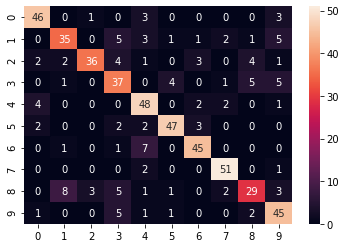

In [28]:
y_pred1=clf2.predict(df_1.data[1257:1797])
y_true=df_1.target[1257:1797]
cm1=confusion_matrix(y_true,y_pred1)
sns.heatmap(cm1,annot=True)

In [29]:
print('Test set score is\n',clf2.score(df_1.data[1257:1797],df_1.target[1257:1797]))

Test set score is
 0.7759259259259259


Even if we have tuned the parameters the accuracy is showing low.Let's try without tuning.

In [30]:
clf3=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1)
clf3.fit(df_1.data[1:1257],df_1.target[1:1257])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
print('Test set score is\n',clf3.score(df_1.data[1257:1797],df_1.target[1257:1797]))

Test set score is
 0.7981481481481482


Here also the accuracy is less than 95 percent.So the Null Hypothesis will be rejected and Alternate Hypothesis will be accepted.That means not all the time the dataset gives accuracy greater than 95% it depends upon the algorithm with which we are trying to predict as well as the parameters of that algorithm also.